In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data-cleaned.csv')
df.drop(labels="true_cause", axis=1, inplace=True)

In [3]:
# dataset general info
df.info()

categorical = [var for var in df.columns if df[var].dtype=='O']
numerical = [var for var in df.columns if var not in categorical]

# clean up categorical null variable
for var in categorical:
  df[var]= df[var].fillna("N/A")
  print(df[var].value_counts())


# clean up numerical null variable using median
for var in numerical:
  df[var] = df[var].fillna(df[var].median())
print(categorical)
print(numerical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25321 entries, 0 to 25320
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_year                     25321 non-null  int64  
 1   general_cause_desc            25321 non-null  object 
 2   isNaturalCaused               25321 non-null  int64  
 3   assessment_hectares           25321 non-null  float64
 4   current_size                  25321 non-null  float64
 5   fire_spread_rate              22569 non-null  float64
 6   fire_type                     22752 non-null  object 
 7   fire_position_on_slope        22512 non-null  object 
 8   weather_conditions_over_fire  22503 non-null  object 
 9   temperature                   22501 non-null  float64
 10  relative_humidity             22499 non-null  float64
 11  wind_direction                22498 non-null  object 
 12  wind_speed                    22498 non-null  float64
dtypes

In [4]:
df.shape

(25321, 13)

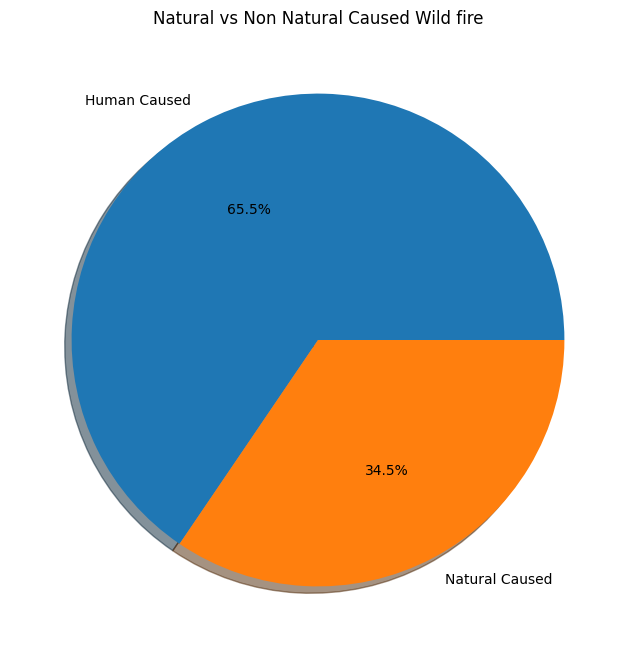

In [5]:
# global data visualization
import matplotlib.pyplot as plt
import seaborn as sns

f,ax=plt.subplots(figsize=(18,8))
ax.pie(df['isNaturalCaused'].value_counts(),labels=["Human Caused", "Natural Caused"], explode=[0,0],autopct='%1.1f%%',shadow=True)
ax.set_title('Natural vs Non Natural Caused Wild fire')

plt.show()

[]

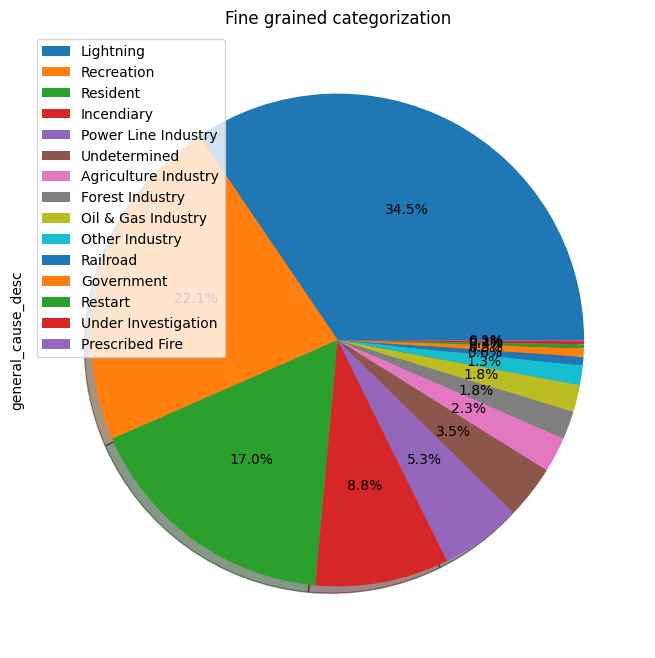

In [6]:
f,ax=plt.subplots(figsize=(18,8))
ax = df['general_cause_desc'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, labeldistance=None)
ax.set_title('Fine grained categorization')

plt.legend()
plt.plot()


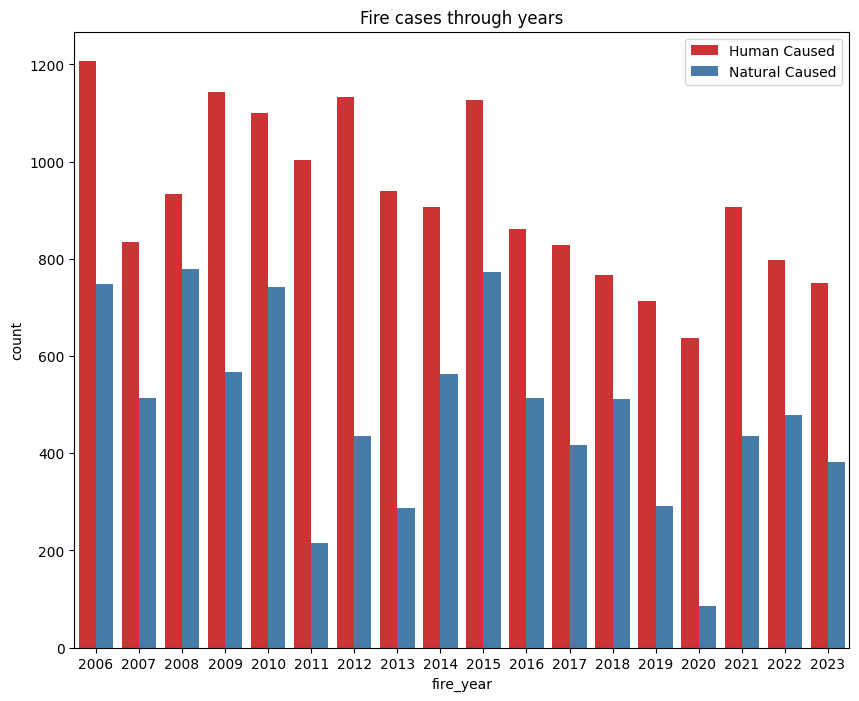

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="fire_year", hue="isNaturalCaused", data=df, palette="Set1",)
ax.set_title("Fire cases through years")
ax.legend(["Human Caused", "Natural Caused"])
plt.show()

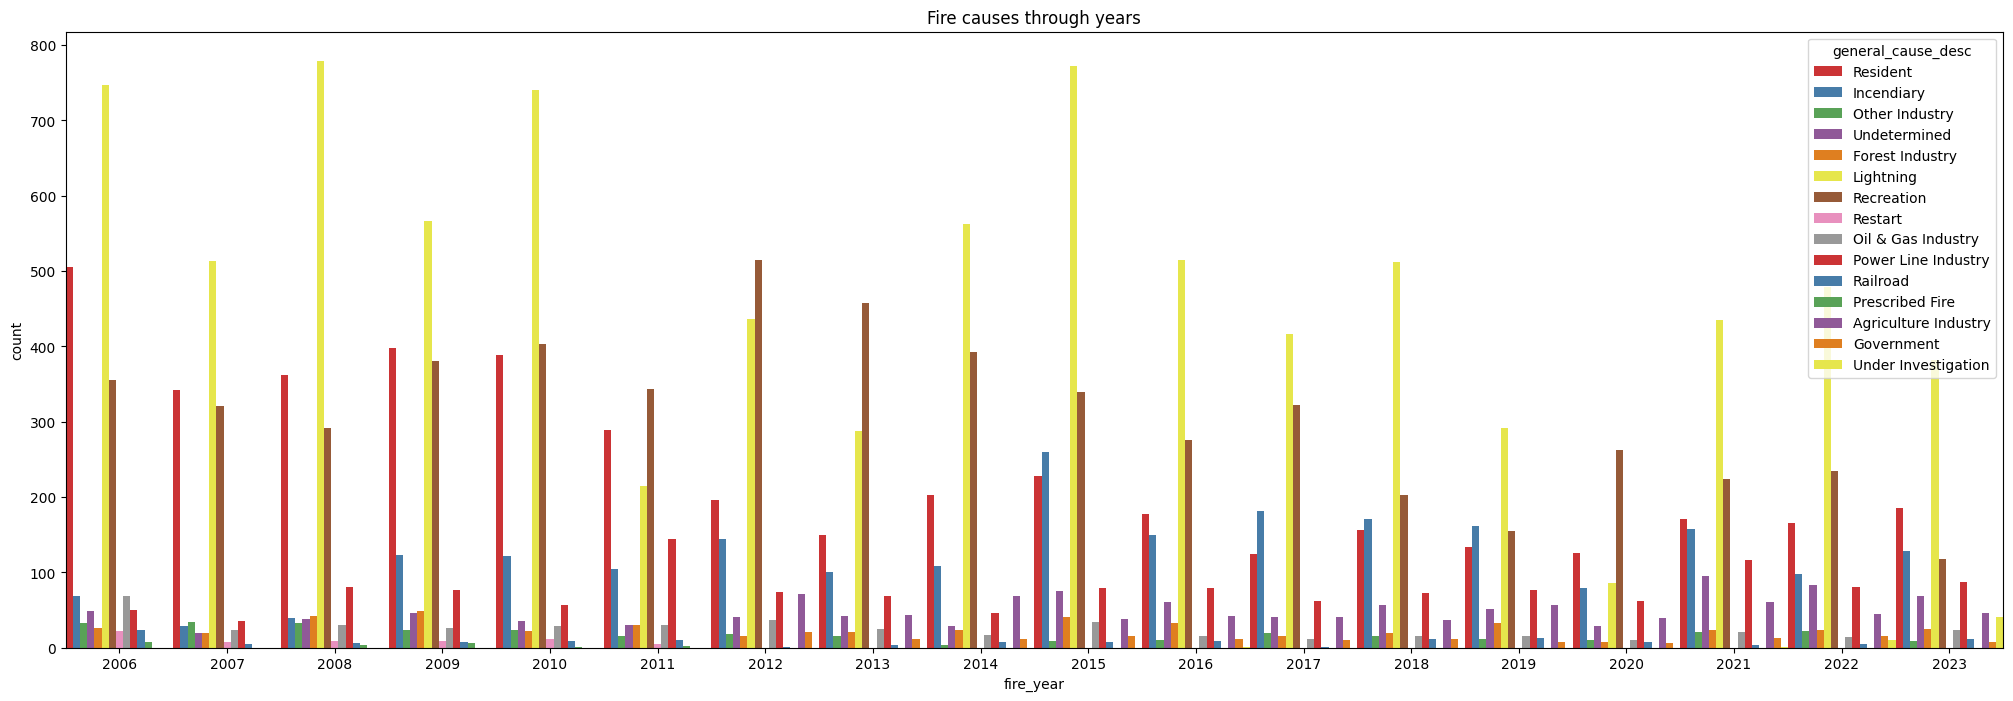

In [8]:
f, ax = plt.subplots(figsize=(25, 8))
ax = sns.countplot(x="fire_year", hue="general_cause_desc", data=df, palette="Set1", width=1)
ax.set_title("Fire causes through years")
plt.show()

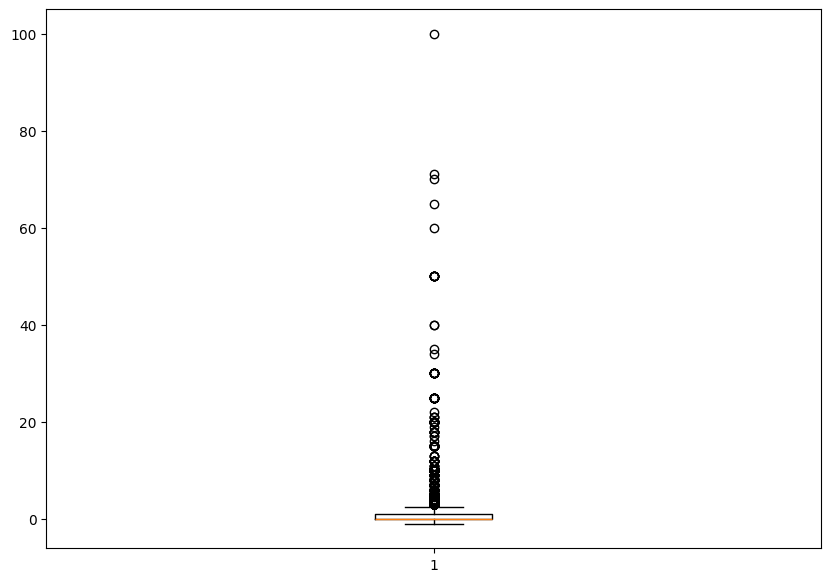

0    0.0
1    0.0
2    0.0
3    0.0
4    0.1
Name: fire_spread_rate, dtype: float64

In [9]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(df["fire_spread_rate"])

# show plot
plt.show()
df["fire_spread_rate"].head()

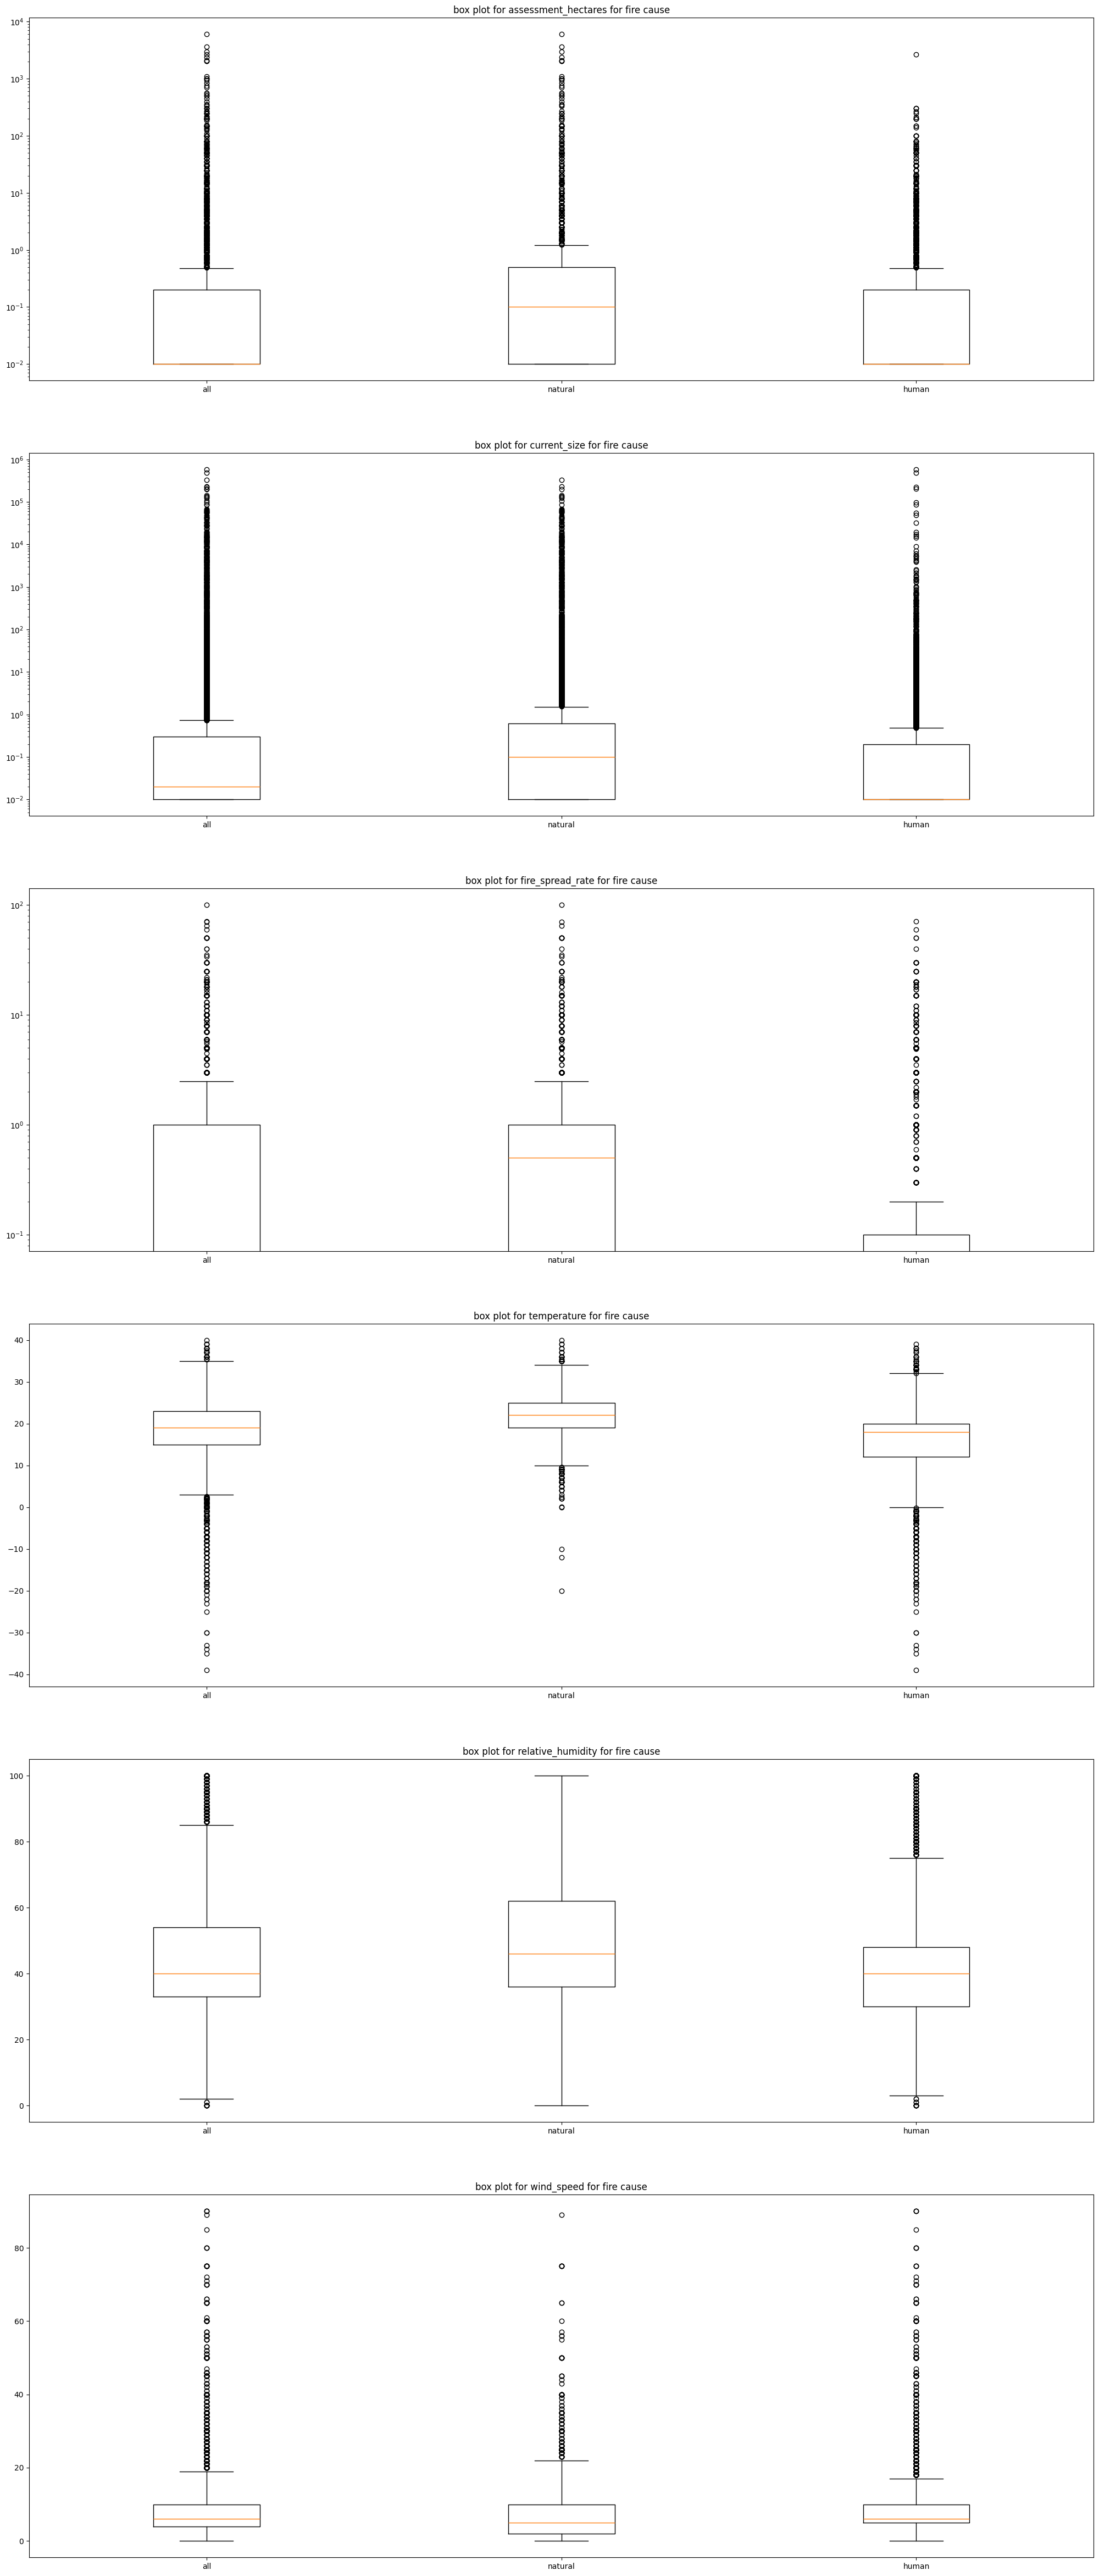

In [10]:
# box plot of numerical variable
data_natural = df.loc[df["isNaturalCaused"] == 1]
data_human = df.loc[df["isNaturalCaused"] == 0]

data_list = {"all": df,"natural": data_natural, "human": data_human}

f, ax = plt.subplots(len(numerical) - 2, 1, figsize=(25, 60))

row_ax = 0
for header in numerical:
  if(header != "fire_year" and header !="isNaturalCaused"):
    axes = ax[row_ax]
    plot_data = [value[header] for value in data_list.values()]
    labels = [key for key in data_list.keys()]
    axes.boxplot(plot_data, labels=labels)
    axes.set_title(f"box plot for {header} for fire cause")
    if(header in ["assessment_hectares","current_size","fire_spread_rate"]):
      axes.set_yscale('log')
    else:
      axes.set_yscale('linear')
    row_ax+=1

plt.show()

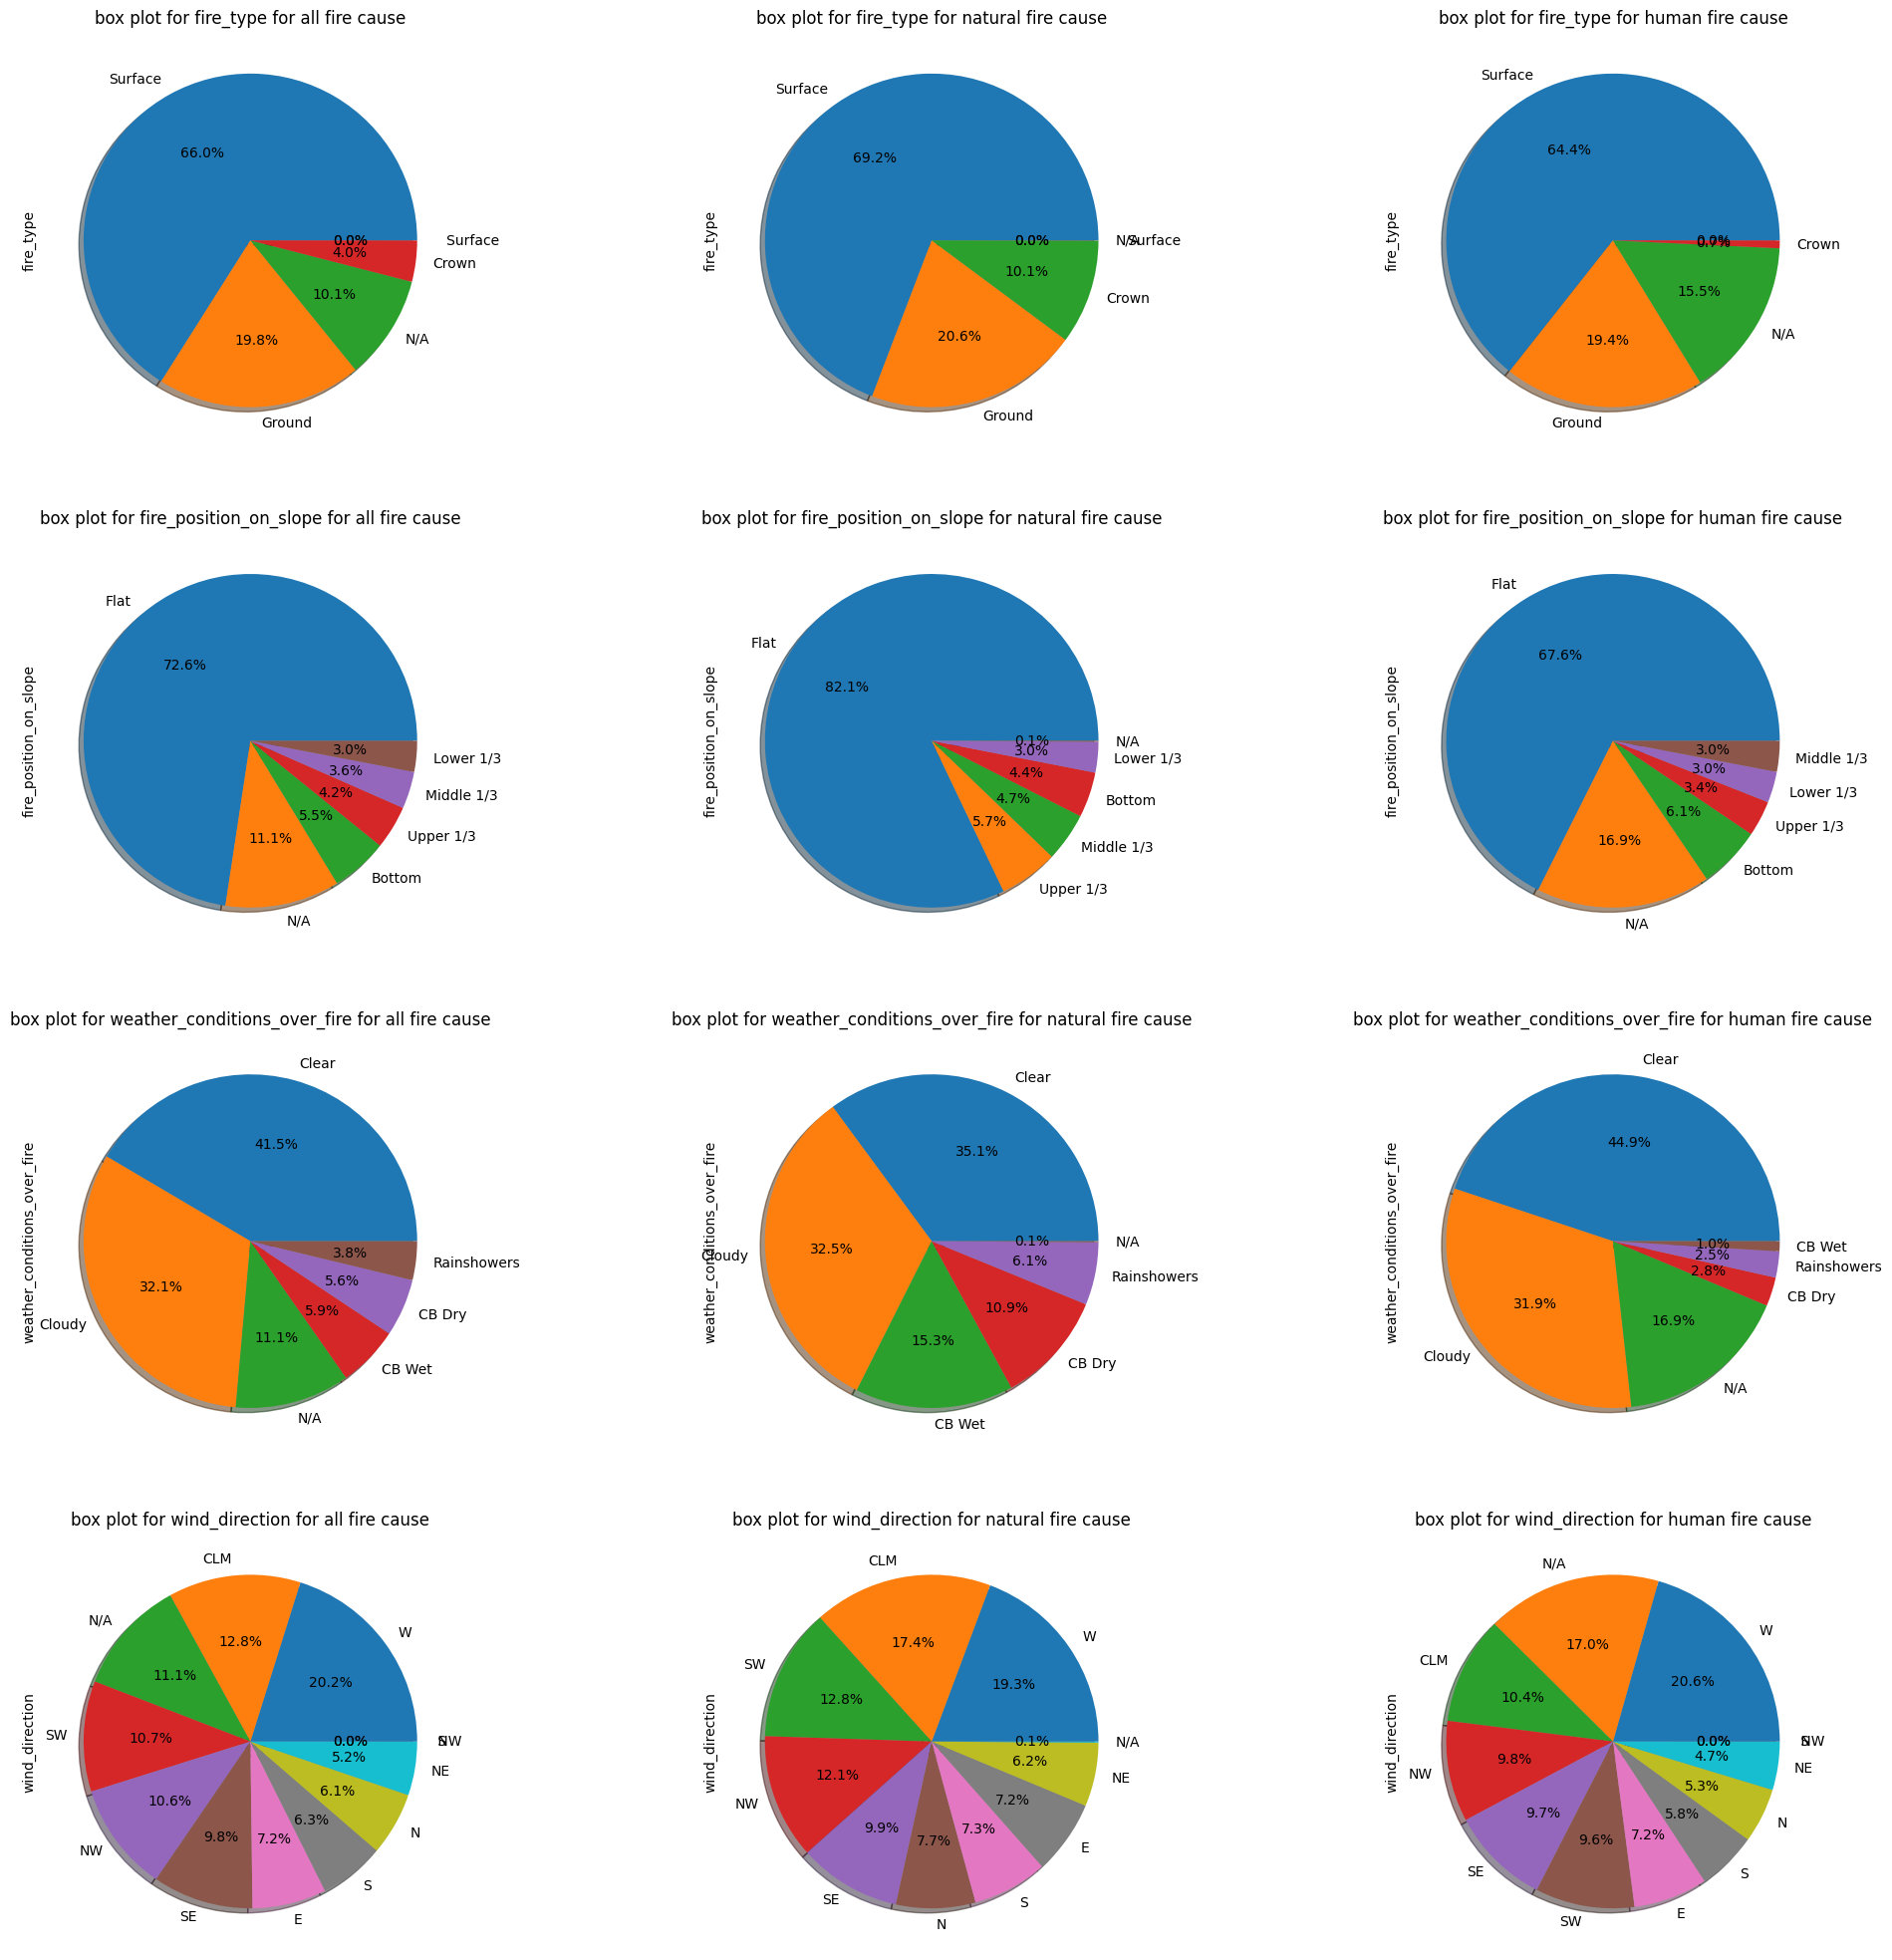

In [11]:


f, ax = plt.subplots(len(categorical) - 1, len(data_list.keys()),figsize=(25, 25))
column_ax = 0
row_ax = 0
for frame_name in data_list.keys():
  data = data_list[frame_name]
  for header in categorical:
    if header != "general_cause_desc":
      axes = ax[row_ax, column_ax]
      axes = data[header].value_counts().plot.pie(autopct='%1.1f%%',ax=axes,shadow=True)
      axes.set_title(f"box plot for {header} for {frame_name} fire cause")
      row_ax +=1
  column_ax += 1
  row_ax = 0

plt.show()